<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/src/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Pythonic Data Analysis</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="http://matplotlib.org/_images/date_demo.png" alt="METAR" style="height: 300px;"></div>

### Questions
1. How can we employ Python language features to make complicated analysis require less code?
1. How can we make multi panel plots?
1. What can be done to eliminate repeated code that operates on sequences of objects?
1. How can functions be used to encapsulate calculations and behaviors?

### Objectives
1. <a href="#basicfunctionality">From the Time Series Plotting Episode</a>
1. <a href="#multipanel">Multi-panel plots</a>
1. <a href="#iteration">Iteration and Enumeration</a>
1. <a href="#functions">Functions</a>
1. <a href="#argskwargs">Args and Kwargs</a>
1. <a href="#plottingiteration">Plotting with Iteration</a>
1. <a href="#multifile">Plotting Multiple Files</a>

<a name="basicfunctionality"></a>
## 1. From Time Series Plotting Episode
Here's the basic set of imports and data reading functionality that we established in the [Basic Time Series Plotting](../Time_Series/Basic%20Time%20Series%20Plotting.ipynb) notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator
from siphon.simplewebservice.ndbc import NDBC

%matplotlib inline

In [2]:
# Read in some data
df = NDBC.realtime_observations('42039')

# Trim to the last 7 days
df = df[df['time'] > (pd.Timestamp.utcnow() - pd.Timedelta(days=7))]

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="multipanel"></a>
## 2. Multi-panel Plots

Often we wish to create figures with multiple panels of data. It's common to separate variables of different types into these panels. We also don't want to create each panel as an individual figure and combine them in a tool like Illustrator - imagine having to do that for hundreds of plots!

Previously we specified subplots individually with `plt.subplot()`. We can instead use the `subplots` method to specify a number of rows and columns of plots in our figure, which returns the figure and all of the axes (subplots) we ask for in a single call:

/home/travis/miniconda/envs/unidata/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Buoy 42039 Data')

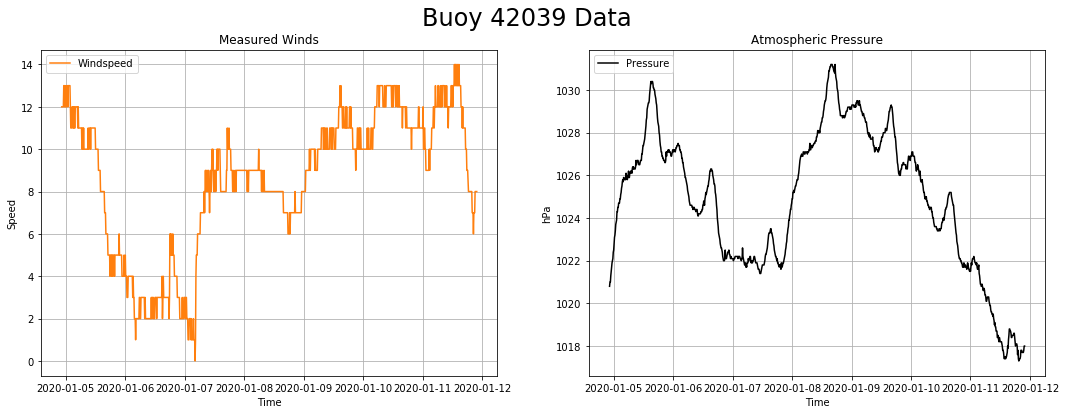

In [3]:
# ShareX means that the axes will share range, ticking, etc. for the x axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(18, 6))

# Panel 1
ax1.plot(df.time, df.wind_speed, color='tab:orange', label='Windspeed')
ax1.set_xlabel('Time')
ax1.set_ylabel('Speed')
ax1.set_title('Measured Winds')
ax1.legend(loc='upper left')
ax1.grid(True)

# Not repeated only by sharing x
ax1.xaxis.set_major_formatter(DateFormatter('%m/%d'))
ax1.xaxis.set_major_locator(DayLocator())

# Panel 2
ax2.plot(df.time, df.pressure, color='black', label='Pressure')
ax2.set_xlabel('Time')
ax2.set_ylabel('hPa')
ax2.set_title('Atmospheric Pressure')
ax2.legend(loc='upper left')
ax2.grid(True)

plt.suptitle('Buoy 42039 Data', fontsize=24)

So even with the sharing of axis information, there's still a lot of repeated code. This current version with just two parameters might still be ok, but:

- What if we had more data being plotted on each axes?
- What if we had many subplots?
- What if we wanted to change one of the parameters?
- What if we wanted to plot data from different files on the same plot?

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="iteration"></a>
## 3. Iteration and Enumeration
Iterating over lists is a very useful tool to reduce the amount of repeated code you write. We're going to start out by iterating over a single list with a `for` loop. Unlike C or other common scientific languages, Python 'knows' how to iterate over certain objects without you needing to specify an index variable and do the book keeping on that.

In [4]:
my_list = ['2001 A Space Obyssey',
           'The Princess Bride',
           'Monty Python and the Holy Grail']

for item in my_list:
    print(item)

2001 A Space Obyssey
The Princess Bride
Monty Python and the Holy Grail


Using the `zip` function we can even iterate over multiple lists at the same time with ease:

In [5]:
my_other_list = ['I\'m sorry, Dave. I\'m afraid I can\'t do that.',
                 'My name is Inigo Montoya.',
                 'It\'s only a flesh wound.']

for item in zip(my_list, my_other_list):
    print(item)

('2001 A Space Obyssey', "I'm sorry, Dave. I'm afraid I can't do that.")
('The Princess Bride', 'My name is Inigo Montoya.')
('Monty Python and the Holy Grail', "It's only a flesh wound.")


That's really handy, but needing to access each part of each item with an index like `item[0]` isn't very flexible, requires us to remember the layout of the item, and isn't best practice. Instead we can use Python's unpacking syntax to make things nice and intuitive.

In [6]:
for reference, quote in zip(my_list, my_other_list):
    print(reference, '-', quote)

2001 A Space Obyssey - I'm sorry, Dave. I'm afraid I can't do that.
The Princess Bride - My name is Inigo Montoya.
Monty Python and the Holy Grail - It's only a flesh wound.


<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
    <li>Make two new lists named <code>plot_variables</code> and <code>plot_names</code>. Populate them
        with the variable name and plot label string for windspeed and pressure.</li>
    <li>Using the unpacking syntax, write a for loop that prints a sentence describing the action
        that would be taken (i.e. Plotting variable wind_speed as Windspeed</li>
    </ul>
</div>

In [7]:
# YOUR CODE GOES HERE

<div class="alert alert-info">
    <b>SOLUTION</b>
</div>

In [8]:
# %load solutions/zip.py

# Cell content replaced by load magic replacement.
plot_variables = ['wind_speed', 'pressure']
plot_names = ['Windspeed', 'Atmospheric Pressure']

for var, name in zip(plot_variables, plot_names):
    print('Plotting variable', var, 'as', name)


Plotting variable wind_speed as Windspeed
Plotting variable pressure as Atmospheric Pressure


`zip` can also be used to "unzip" items.

In [9]:
zipped_list = [(1, 2), 
               (3, 4),
               (5, 6)]
unzipped = zip(*zipped_list)
print(list(unzipped))

[(1, 3, 5), (2, 4, 6)]


Let's break down what happened there. Zip pairs elements from all of the input arguements and hands those back to us. So effectively out `zip(*zipped_list)` is `zip((1, 2), (3, 4), (5, 6))`, so the first element from each input is paired (1, 3, 5), etc. You can think of it like unzipping or transposing. 

---

We can use the `enumerate` function to 'count through' an iterable object as well. This can be useful when placing figures in certain rows/columns or when a counter is needed.

In [10]:
for i, quote in enumerate(my_other_list):
    print(i, ' - ', quote)

0  -  I'm sorry, Dave. I'm afraid I can't do that.
1  -  My name is Inigo Montoya.
2  -  It's only a flesh wound.


<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
    <li>Combine what you've learned about enumeration and iteration to produce the following output:</li>
    </ul>
    <code>0  -  2001 A Space Obyssey  -  I'm sorry, Dave. I'm afraid I can't do that.
1  -  The Princess Bride  -  My name is Inigo Montoya.
2  -  Monty Python and the Holy Grail  -  It's only a flesh wound.</code>
</div>

In [11]:
# YOUR CODE GOES HERE

<div class="alert alert-info">
    <b>SOLUTION</b>
</div>

In [12]:
# %load solutions/enumerate.py

# Cell content replaced by load magic replacement.
for i, item in enumerate(zip(my_list, my_other_list)):
    reference, quote = item
    print(i, ' - ', reference, ' - ', quote)


0  -  2001 A Space Obyssey  -  I'm sorry, Dave. I'm afraid I can't do that.
1  -  The Princess Bride  -  My name is Inigo Montoya.
2  -  Monty Python and the Holy Grail  -  It's only a flesh wound.


<a href="#top">Top</a>
<hr style="height:2px;">

<a name="functions"></a>
## 4. Functions
You're probably already familiar with Python functions, but here's a quick refresher. Functions are used to house blocks of code that we can run repeatedly. Paramters are given as inputs, and values are returned from the function to where it was called. In the world of programming you can think of functions like paragraphs, they encapsulate a complete idea/process.

Let's define a simple function that returns a value:

In [13]:
def silly_add(a, b):
    return a + b

We've re-implemented add which isn't incredibly exiciting, but that could be hundreds of lines of a numerical method, making a plot, or some other task. Using the function is simple:

In [14]:
result = silly_add(3, 4)
print(result)

7


<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
    <li>Write a function that returns powers of 2. (i.e. calling <code>myfunc(4)</code> returns 2^4)</li>
         <li><b>Bonus</b>: Using for loop iteration, print all powers of 2 from 0 to 24.</li>
    </ul>
</div>

In [15]:
# Your code goes here
def myfunc(power):
    return 2**power

for i in range(25):
    print(myfunc(i))

1
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
65536
131072
262144
524288
1048576
2097152
4194304
8388608
16777216


<div class="alert alert-info">
    <b>SOLUTION</b>
</div>

In [16]:
# %load solutions/functions.py

# Cell content replaced by load magic replacement.
def myfunc(exp):
    return 2**exp

for i in range(0, 25):
    print(myfunc(i))


1
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
65536
131072
262144
524288
1048576
2097152
4194304
8388608
16777216


### Reading buoy data with a function

Let's create a function to read in buoy data and trim it down to the last 7 days by only providing the buoy number to the function.

In [17]:
def read_buoy_data(buoy, days=7):
    # Read in some data
    df = NDBC.realtime_observations(buoy)

    # Trim to the last 7 days
    df = df[df['time'] > (pd.Timestamp.utcnow() - pd.Timedelta(days=days))]
    return df

In [18]:
df = read_buoy_data('42039')
df

,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,average_wave_period,dominant_wave_direction,pressure,air_temperature,water_temperature,dewpoint,visibility,3hr_pressure_tendency,water_level_above_mean,time
0,180.0,8.0,10.0,3.0,8.0,6.6,167.0,1018.0,NaN,23.0,NaN,NaN,NaN,NaN,2020-01-11 21:50:00+00:00
1,180.0,8.0,10.0,NaN,NaN,NaN,NaN,1018.0,NaN,23.0,NaN,NaN,NaN,NaN,2020-01-11 21:40:00+00:00
2,170.0,8.0,10.0,NaN,NaN,NaN,NaN,1017.8,NaN,23.0,NaN,NaN,NaN,NaN,2020-01-11 21:30:00+00:00
3,170.0,8.0,9.0,NaN,NaN,NaN,NaN,1017.7,NaN,23.0,NaN,NaN,NaN,NaN,2020-01-11 21:20:00+00:00
4,170.0,8.0,9.0,NaN,NaN,NaN,NaN,1017.7,NaN,23.0,NaN,NaN,NaN,NaN,2020-01-11 21:10:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,320.0,12.0,16.0,NaN,NaN,NaN,NaN,1021.5,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-04 23:00:00+00:00
998,320.0,12.0,15.0,2.7,7.0,5.6,306.0,1021.3,NaN,22.5,NaN,NaN,NaN,NaN,2020-01-04 22:50:00+00:00
999,320.0,12.0,15.0,NaN,NaN,NaN,NaN,1021.0,NaN,22.5,NaN,NaN,NaN,NaN,2020-01-04 22:40:00+00:00
1000,320.0,12.0,15.0,NaN,NaN,NaN,NaN,1021.0,NaN,22.5,NaN,NaN,NaN,NaN,2020-01-04 22:30:00+00:00


<a href="#top">Top</a>
<hr style="height:2px;">

<a name="argskwargs"></a>
## 5. Args and Kwargs

Within a function call, we can also set optional arguments and keyword arguments (abbreviated args and kwargs in Python). Args are used to pass a *variable* length list of *non-keyword* arguments. This means that args don't have a specific keyword they are attached to, and are used in the order provided. Kwargs are arguments that are attached to specific keywords, and therefore have a specific use within a function.

### Args Example

In [19]:
def arg_func(*argv):  
    for arg in argv:  
        print (arg) 
    
arg_func('Welcome', 'to', 'the', 'Python', 'Workshop')  

Welcome
to
the
Python
Workshop


### Kwargs Example

In [20]:
# Create a function to conduct all basic math operations, using a kwarg
def silly_function(a, b, operation=None):
    if operation == 'add':
        return a + b
    elif operation == 'subtract':
        return a - b
    elif operation == 'multiply':
        return a * b
    elif operation == 'division':
        return a / b
    else:
        raise ValueError('Incorrect value for "operation" provided.')

In [21]:
print(silly_function(3, 4, operation='add'))
print(silly_function(3, 4, operation='multiply'))

7
12


Kwargs are commonly used in MetPy, matplotlib, pandas, and many other Python libraries (in fact we've used them in almost every notebook so far!).

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="plottingiteration"></a>
## 6. Plotting with Iteration
Now let's bring what we've learned about iteration to bear on the problem of plotting. We'll start with a basic example and roll into a more involved system at the end.

To begin, let's make an arbitrary number of plots in a single row:

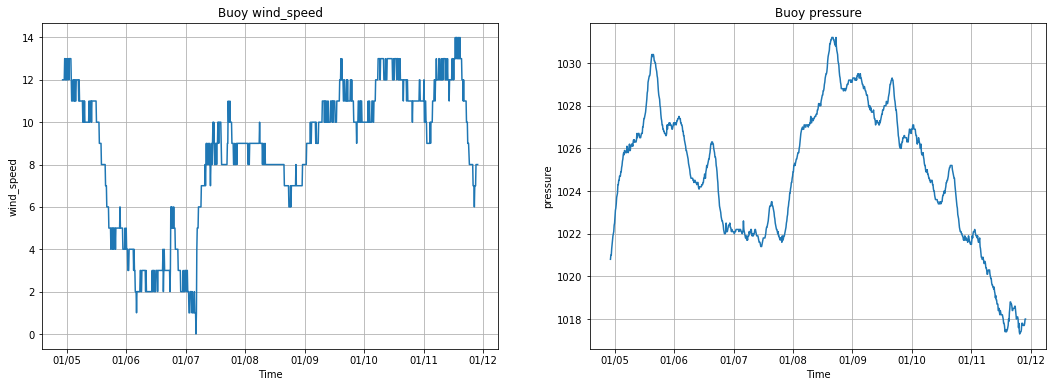

In [22]:
# A list of names of variables we want to plot
plot_variables = ['wind_speed', 'pressure']

# Make our figure, now choosing number of subplots based on length of variable name list
fig, axes = plt.subplots(1, len(plot_variables), sharex=True, figsize=(18, 6))

# Loop over the list of subplots and names together
for ax, var_name in zip(axes, plot_variables):
    
    ax.plot(df.time, df[var_name])

    # Set label/title based on variable name--no longer hard-coded
    ax.set_ylabel(var_name)
    ax.set_title(f'Buoy {var_name}')

    # Set up our formatting--note lack of repetition
    ax.grid(True)
    ax.set_xlabel('Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())

It's a step forward, but we've lost a lot of formatting information. The lines are both blue, the labels as less ideal, and the title just uses the variable name. We can use some of Python's features like dictionaries, functions, and string manipulation to help improve the versatility of the plotter.

To start out, let's get the line color functionality back by using a Python dictionary to hold that information. Dictionaries can hold any data type and allow you to access that value with a key (hence the name key-value pair). We'll use the variable name for the key and the value will be the color of line to plot.

In [23]:
colors = {'wind_speed': 'tab:orange', 'wind_gust': 'tab:olive', 'pressure': 'black'}

To access the value, just access that element of the dictionary with the key.

In [24]:
colors['pressure']

'black'

Now let's apply that to our plot. We'll use the same code from the previous example, but now look up the line color in the dictionary.

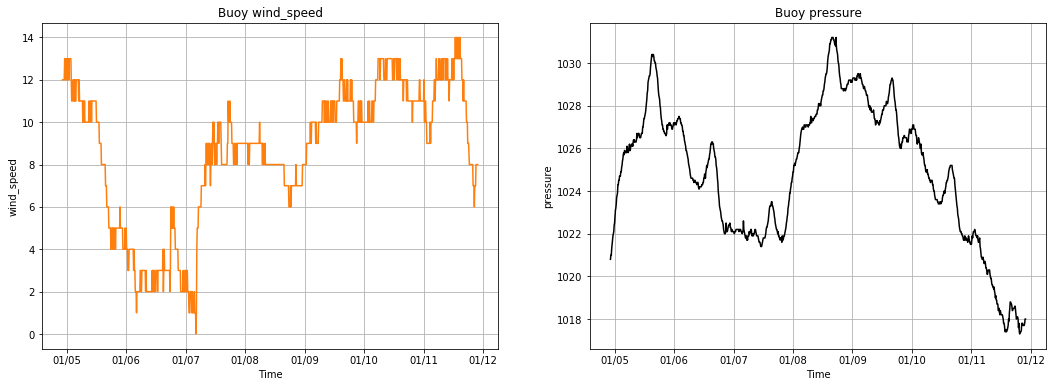

In [25]:
fig, axes = plt.subplots(1, len(plot_variables), sharex=True, figsize=(18, 6))

for ax, var_name in zip(axes, plot_variables):

    # Grab the color from our dictionary and pass it to plot()
    color = colors[var_name]
    ax.plot(df.time, df[var_name], color)

    ax.set_ylabel(var_name)
    ax.set_title(f'Buoy {var_name}')

    ax.grid(True)
    ax.set_xlabel('Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())

That's already much better. We need to be able to plot multiple variables on the wind speed/gust plot though. In this case, we'll allow a list of variables for each plot to be given and iterate over them. We'll store this in a list of lists. Each plot has its own list of variables!

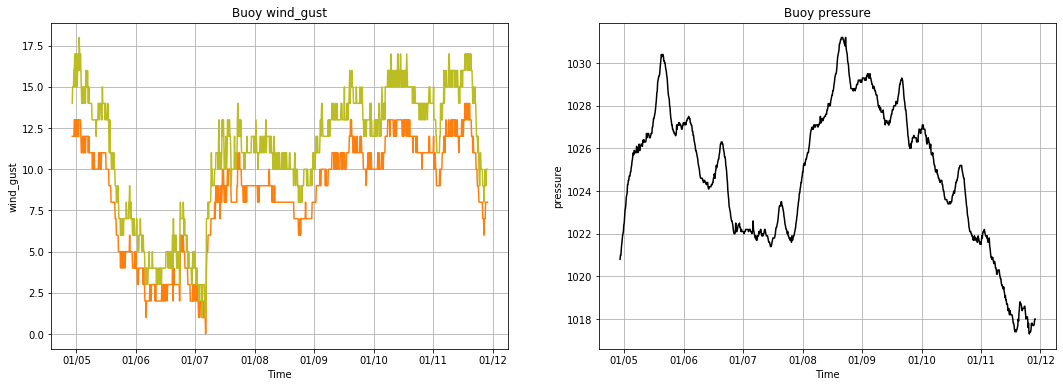

In [26]:
plot_variables = [['wind_speed', 'wind_gust'], ['pressure']]

fig, axes = plt.subplots(1, len(plot_variables), sharex=True, figsize=(18, 6))

for ax, var_names in zip(axes, plot_variables):

    for var_name in var_names:
        # Grab the color from our dictionary and pass it to plot()
        color = colors[var_name]
        ax.plot(df.time, df[var_name], color)

    ax.set_ylabel(var_name)
    ax.set_title(f'Buoy {var_name}')

    ax.grid(True)
    ax.set_xlabel('Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
    <li>Create a dictionary of linestyles in which the variable name is the key and the linestyle is the value.</li>
    <li>Use that dictionary to modify the code below to plot the lines with the styles you specified.</li>
    </ul>
</div>

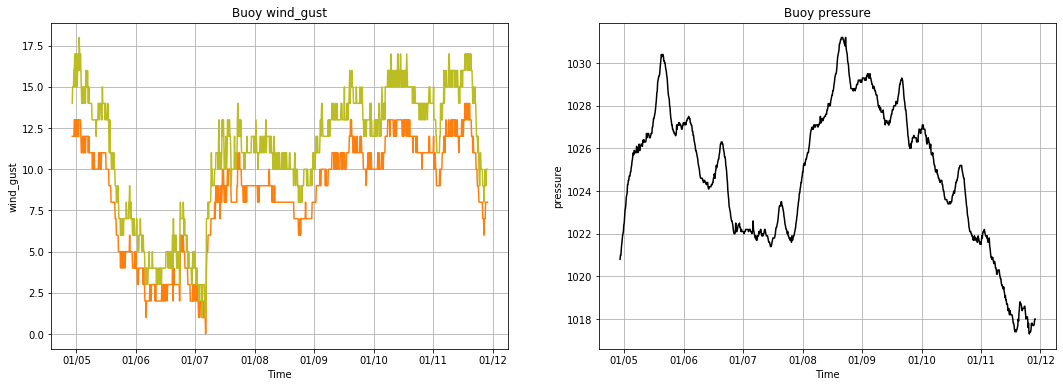

In [27]:
# Create your linestyles dictionary and modify the code below

fig, axes = plt.subplots(1, len(plot_variables), sharex=True, figsize=(18, 6))

for ax, var_names in zip(axes, plot_variables):

    for var_name in var_names:
        # Grab the color from our dictionary and pass it to plot()
        color = colors[var_name]
        ax.plot(df.time, df[var_name], color)

    ax.set_ylabel(var_name)
    ax.set_title(f'Buoy {var_name}')

    ax.grid(True)
    ax.set_xlabel('Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())

<div class="alert alert-info">
    <b>SOLUTION</b>
</div>

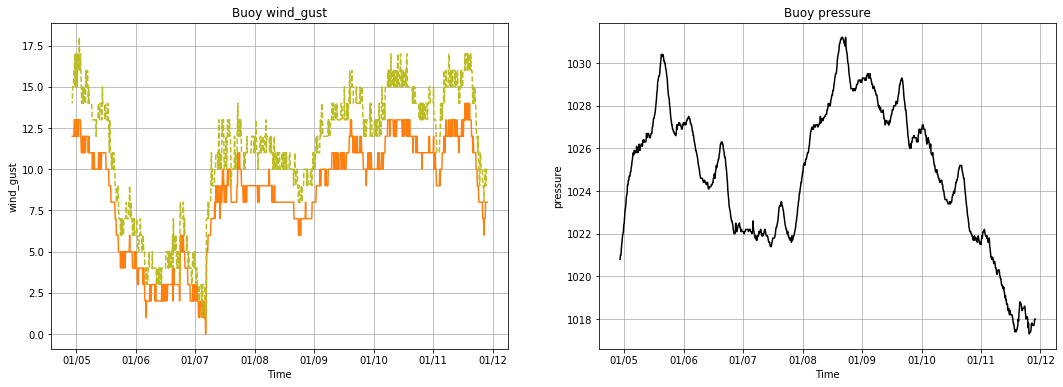

In [28]:
# %load solutions/looping1.py

# Cell content replaced by load magic replacement.
linestyles = {'wind_speed': '-', 'wind_gust': '--', 'pressure': '-'}

fig, axes = plt.subplots(1, len(plot_variables), sharex=True, figsize=(18, 6))

for ax, var_names in zip(axes, plot_variables):

    for var_name in var_names:
        # Grab the color from our dictionary and pass it to plot()
        color = colors[var_name]
        linestyle = linestyles[var_name]
        ax.plot(df.time, df[var_name], color, linestyle=linestyle)

    ax.set_ylabel(var_name)
    ax.set_title(f'Buoy {var_name}')

    ax.grid(True)
    ax.set_xlabel('Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())


We're almost back to where to started, but in a much more versatile form! We just need to make the labels and titles look nice. To do that, let's write a function that uses some string manipulation to clean up the variable names and give us an axis/plot title and legend label.

In [29]:
def format_varname(varname):
    parts = varname.split('_')
    title = parts[0].title()
    label = varname.replace('_', ' ').title()
    return title, label

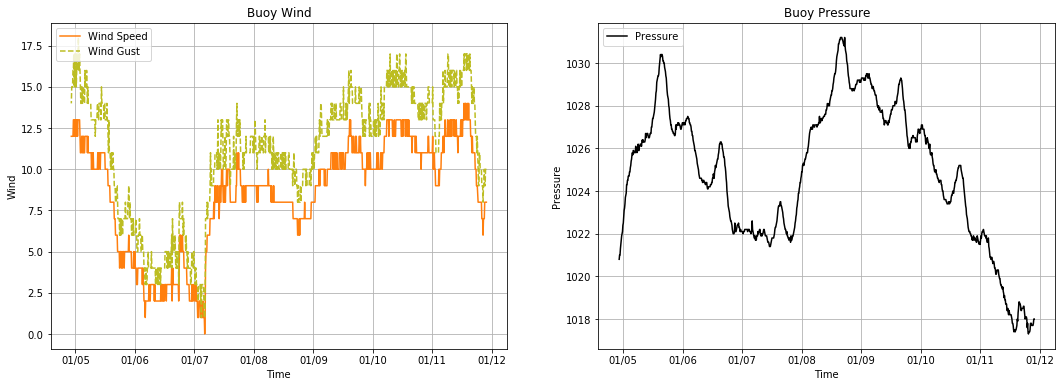

In [30]:
fig, axes = plt.subplots(1, len(plot_variables), sharex=True, figsize=(18, 6))
linestyles = {'wind_speed': '-', 'wind_gust': '--', 'pressure': '-'}

for ax, var_names in zip(axes, plot_variables):

    for var_name in var_names:
        
        title, label = format_varname(var_name)
        
        color = colors[var_name]
        linestyle = linestyles[var_name]
        ax.plot(df.time, df[var_name], color, linestyle=linestyle, label=label)

    ax.set_ylabel(title)
    ax.set_title(f'Buoy {title}')

    ax.grid(True)
    ax.set_xlabel('Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())
    ax.legend(loc='upper left')

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="multifile"></a>
## 7. Plotting Multiple Files

Finally, let's plot data for two buoys on the same figure by iterating over a list of file names. We can use enumerate to plot each file on a new row of the figure. We will also create a function to read in the buoy data and avoid all of that repeated code.

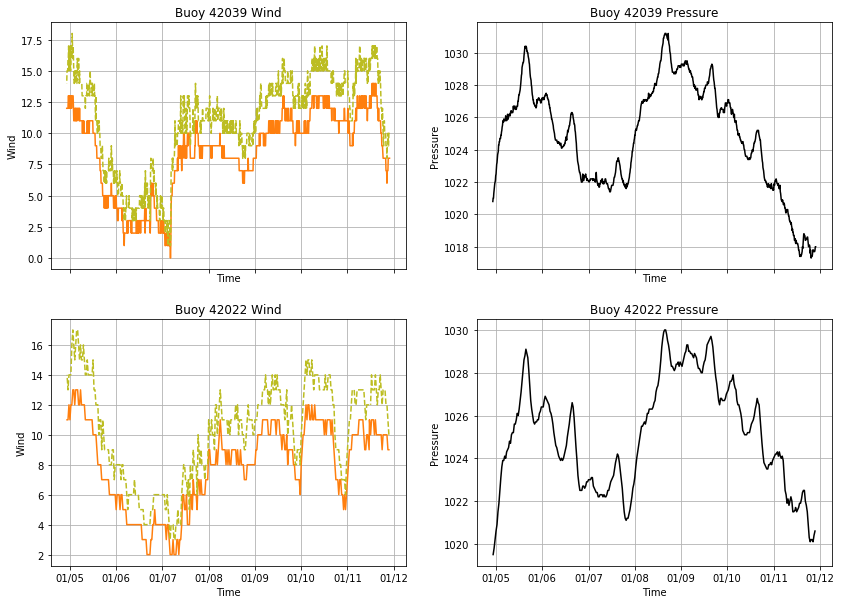

In [31]:
buoys = ['42039', '42022']

fig, axes = plt.subplots(len(buoys), len(plot_variables), sharex=True, figsize=(14, 10))

for row, buoy in enumerate(buoys):
    df = read_buoy_data(buoy)
    
    for col, var_names in enumerate(plot_variables):
        ax = axes[row,col]
        for var_name in var_names:
            title, label = format_varname(var_name)
            color = colors[var_name]
            linestyle = linestyles[var_name]
            ax.plot(df.time, df[var_name], color, linestyle=linestyle, label=label)

        ax.set_ylabel(title)
        ax.set_title(f'Buoy {buoy} {title}')

        ax.grid(True)
        ax.set_xlabel('Time')
        ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
        ax.xaxis.set_major_locator(DayLocator())

<a href="#top">Top</a>
<hr style="height:2px;">